In [1]:
import os
os.chdir("D:/DataSet/自然语言")

思路1：TF-IDF + 机器学习分类器：直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。
思路2：FastText：FastText是入门款的词向量，利用Facebook提供的FastText工具，可以快速构建出分类器。
思路3：WordVec + 深度学习分类器：WordVec是进阶款的词向量，并通过构建深度学习分类完成分类。深度学习分类的网络结构可以选择TextCNN、TextRNN或者BiLSTM。
思路4：Bert词向量：Bert是高配款的词向量，具有强大的建模学习能力。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy
from collections import Counter

In [3]:
df_train = pd.read_csv('train_set.csv', sep='\t')
#df_test = pd.read_csv(, sep='\t')

In [4]:
df_train.dtypes

label     int64
text     object
dtype: object

In [5]:
#df_train['text'].str.split()

def split_df(df_row):
    return len(str(df_row).split())
# 运行速度远快于上面
len_dist = np.vectorize(split_df)(df_train['text'])

In [6]:
pd.Series(len_dist).describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
dtype: float64

Text(0, 0.5, 'prob of sample')

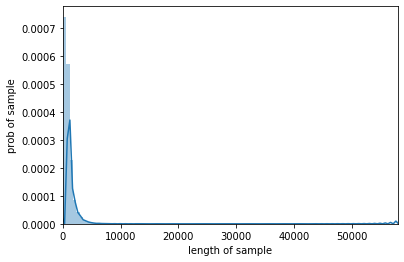

In [8]:
ax = sns.distplot(len_dist, bins=100)
plt.xlim([0, max(len_dist)])
plt.xlabel("length of sample")
plt.ylabel("prob of sample")

In [9]:
trans_data, lam = scipy.stats.boxcox(len_dist+1)
scipy.stats.normaltest(trans_data)

NormaltestResult(statistic=1347.793358118494, pvalue=2.1398873511704724e-293)

In [ ]:
df_train_info = pd.DataFrame(columns=['count','len_mean','len_std','len_min','len_max','freq_fc','freq_lc','freq_freq'])
for name, group in df_train.groupby('label'):
    count = len(group) # 该类别新闻数
    len_mean = np.mean(group['len']) # 该类别长度平均值
    len_std = np.std(group['len']) # 长度标准差
    len_min = np.min(group['len']) # 最短的新闻长度
    len_max = np.max(group['len']) # 最长的新闻长度
    freq_fc = np.argmax(np.bincount(group['first_char'])) # 最频繁出现的首词
    freq_lc = np.argmax(np.bincount(group['last_char'])) # 最频繁出现的末词
    freq_freq = np.argmax(np.bincount(group['most_freq'])) # 该类别最频繁出现的词
    df_train_info.loc[name] = [count,len_mean,len_std,len_min,len_max,freq_fc,freq_lc,freq_freq]
df_train_info